# Data Wrangling Intro

## Gather

In [5]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as myzip:
    myzip.extractall()

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('online-job-postings.csv')

## Assess

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

- Missing values (NaN)

- StartDate inconsistencies (ASAP)
## Clean
#### Define
- Missing values or NaNs
- Start date inconsistencies for ASAP
- Non-descriptive column headers
#### Code

In [12]:
dfc = df.copy()

In [14]:
dfc  = dfc.rename(columns={'ApplicationP': 'ApplicationProcedure', 
                            'AboutC': 'AboutCompany', 
                           'RequiredQual': 'RequiredQualifications',
                           'JobRequirment': 'JobRequirement',})

In [15]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

In [16]:
for a in asap_list:
    dfc['StartDate'].replace(to_replace = a, value = 'ASAP', inplace = True)

In [24]:
dfc['StartDate'].value_counts()['ASAP']

6856

In [22]:
for a in asap_list:
    assert a not in dfc.StartDate.values

### Test

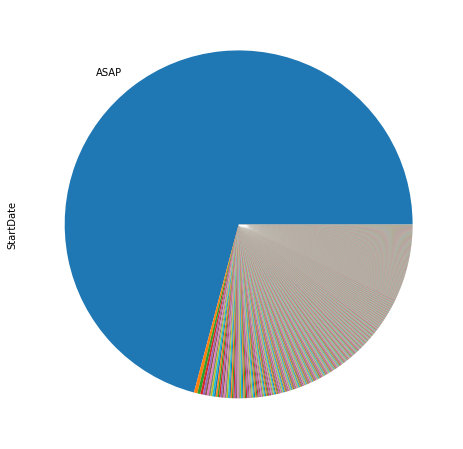

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
labels = np.full(len(df.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
plt.figure(figsize=(8,8))
dfc.StartDate.value_counts().plot(kind="pie", labels=labels)
plt.show()